<a href="https://colab.research.google.com/github/tyler04/Machine-Learning-A-Z-in-Python-Notes/blob/main/Thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

Up until now, all of the methods we’ve seen for tackling the Bandit Problem have selected their actions based on the current averages of the rewards received from those actions. Thompson Sampling (also sometimes referred to as the Bayesian Bandits algorithm) takes a slightly different approach; rather than just refining an estimate of the mean reward it extends this, to instead build up a probability model from the obtained rewards, and then samples from this to choose an action.

In this way, not only is an increasingly accurate estimate of the possible reward obtained, but the model also provides a level of confidence in this reward, and this confidence increases as more samples are collected. This process of updating your beliefs as more evidence becomes available is known as **Bayesian Inference**.



### Bernoulli Thompson Sampling (applied for Binary Problems)



As an introduction, and to make things easier to work with, let’s simplify the power socket problem. Now, instead of each socket returning a varying amount of charge, each socket will either return some charge or no charge; the rewards have only two possible values: 1 when the chosen socket supplies a charge and 0 when it doesn’t. When a random variable has only two possible outcomes its behaviour can be described by the Bernoulli distribution.

So now, instead of the amount of charge varying per socket, the probability of a socket producing a charge varies with each socket. We want to find the socket with the highest probability of returning a charge, rather than the socket that gives the most charge.

As already mentioned, Thompson Sampling generates a model of the reward probabilities. When, as in this case, the available rewards are binary (win or lose, yes or no, charge or no charge) then the Beta distribution is ideal to model this type of probability.

The Beta distribution takes two parameters, ‘α’ (alpha) and ‘β’ (beta). In the simplest terms these parameters can be thought of as respectively the count of successes and failures.

As the number of trials of a socket increases the confidence in the estimated mean increases. This is reflected in the probability distribution becoming narrower and the sampled value will then be drawn from a range of values that are closer to the true mean. As a result, exploration decreases and exploitation increases, since the sockets with a higher probability of returning a reward will begin to be selected with increasing frequency.

As a result, exploration decreases and exploitation increases, since the sockets with a higher probability of returning a reward will begin to be selected with increasing frequency.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [7]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1
  total_reward += reward 


## Visualising the results - Histogram

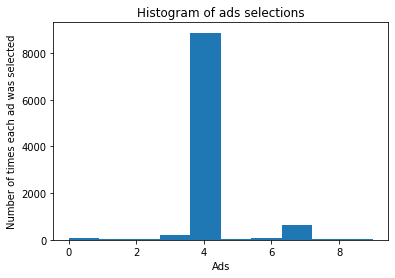

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### Gaussian Thompson Sampling

The simplified socket problem we’ve used so far is a good way to grasp the concepts of Bayesian Thompson Sampling. However, to use this method with our actual socket problem, in which the sockets aren’t binary, but instead return a variable amount of charge, we need to change things slightly.